In [ ]:
import pandas as pd
import math as isnan
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
df = pd.read_csv('drive/MyDrive/TecMilenio/titanic.csv', encoding='UTF8')

Mounted at /content/drive


#Impresión Hola mundo! solicitada por Canvas:

In [ ]:
print("Hola mundo!")

Hola mundo!


#Investigación Instacart solicitada por canvas:

# Instacart
También conocidos como Maplebear inc. es una empresa americana que se dedica a los servicios de pickup y delivery, operando principalmente en los Estados Unidos y Canadá. La compañía ofrece sus servicios a través de app móvil y página web. El servicio permite a los usuarios ordenar de un supermercado y recibir sus compras en casa.


#Disponibilidad de datos

Debido a la no disponibilidad de los datos solicitados en Canvas, se realizó la actividad con un dataframe que muestra datos de los pasajeros del Titanic.

#Datos en bruto obtenidos mediante el archivo titanic.csv:

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
dfNaCount = df.isna().sum()
print(dfNaCount)

NameError: ignored

Se observa que la mayotria de los NaN se encuentran en **Age** y en **Cabin**, con 2 iteraciones en **Embarked**.

In [ ]:
dfBlankCount = df.apply(lambda x: any(x == ""))
print(dfBlankCount)

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool


Se observa que no existen datos vacíos en ningúna columna.

#Limpieza de datos:
Eliminación de NaN's

In [ ]:
df = df.dropna()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


#Conjunto de datos "Titanic".

###PassengerId
Número de identificación de cada pasajero.

###Survived
Indica en un valor booleano convertido a integer si el pasajero sobrevivió o no, con 1 y 0 respectivamente.

###Pclass
Clase en la que el pasajero se alojó durante su estancia en el Titanic. Entre menor el número, mejor la clase en la que se alojó el pasajero. Los valores tienen un rango de 1 a 3.

###Name
Nombre del pasajero. Puede incluir el nombre de soltera para las pasajeras femeninas o un alias.

###Sex
Género del pasajero. Incluye un objeto "string" que indica si es hombre o mujer.

###Age
Edad del pasajero. Valor Integer que va del rango 0.92 hasta 80.

###SibSp
Familiares consanguíneos (hermanos o hermanas) del pasajero que se encontraban a bordo del titanic.

###Parch
Familiares consanguíneos (padre, madre e hijos) del pasajero que se encontraban abordo del titanic.

###Ticket
Identificador único en el boleto del pasajero.

###Fare
Precio del ticket del pasajero.

###Cabin
Identificador de cabina en donde se alojaba el pasajero.

###Embarked
Ubicación o puerto de donde embarcó el pasajero.

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

NameError: ignored

Se observa baja correlación y correlación negativa entre la mayoría de los datos, exceptuando:
- Parch y Fare: Familiares (Padre, madre e hijos) con el precio del ticket del pasajero.
- SibSp y Fare: Familiares (Hermanos o hermanas) con el precio del ticket del pasajero.
- Parch y SibSp: Familiares (Padre, madre e hijos) con familiares (Hermanos o hermanas).

# Supervivencia de los pasajeros

In [ ]:
sobrevivientes = df['Survived'].value_counts()
lengthSobrevivientes = len(df['Survived'])

sobrevivieron = sobrevivientes[1]
noSobrevivieron = sobrevivientes[0]

porcentajeS = (sobrevivieron / lengthSobrevivientes) * 100
porcentajeNS = (noSobrevivieron / lengthSobrevivientes) * 100

print(f"Número de sobrevivientes: {sobrevivieron}, Porcentaje de sobrevivientes: {porcentajeS:.2f}%")
print(f"Número de no sobrevivientes: {noSobrevivieron}, Porcentaje de no sobrevivientes: {porcentajeNS:.2f}%")

Número de sobrevivientes: 342, Porcentaje de sobrevivientes: 38.38%
Número de no sobrevivientes: 549, Porcentaje de no sobrevivientes: 61.62%


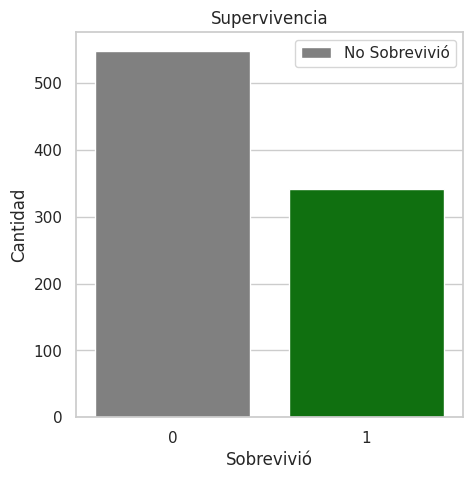

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))

sns.countplot(x='Survived', data=df, palette=["gray", "green"])

plt.title("Supervivencia")
plt.xlabel("Sobrevivió")
plt.ylabel("Cantidad")
plt.legend(labels=['No Sobrevivió', 'Sobrevivió'])

plt.show()

In [ ]:
n_observaciones = len(df)
predicciones = 0 * n_observaciones

precision = (predicciones == df["Survived"]).mean() * 100

print(f"Precisión: {precision:.2f}%")

Precisión: 61.62%


Se observa la cantidad de supervivientes del accidente. Se muestra que un porcentaje mayor de pasajeros no sobrevivió. Se muestra la precision del modelo de predicción de no supervivencia.

#Edad de los Pasajeros

In [ ]:
dfEdades = df.groupby('Survived')['Age'].agg(['mean', 'median', 'min', 'max']).reset_index()
dfEdades.columns = ['Survived', 'Media', 'Mediana', 'Mínimo', 'Máximo']
dfEdades

,Survived,Media,Mediana,Mínimo,Máximo
0,0,30.626179,28.0,1.00,74.0
1,1,28.343690,28.0,0.42,80.0


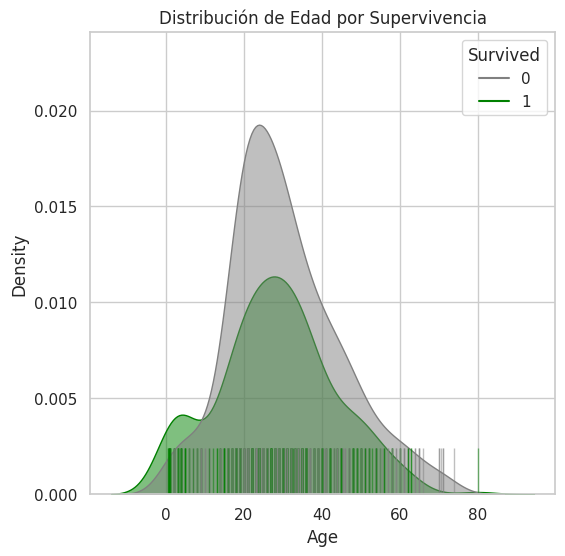

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
sns.kdeplot(data=df, x="Age", hue="Survived", fill=True, alpha=0.5, palette=["gray", "green"])
sns.rugplot(data=df, x="Age", hue="Survived", height=0.1, alpha=0.5, palette=["gray", "green"])
plt.xlabel("Age")
plt.title("Distribución de Edad por Supervivencia")
plt.show()

In [ ]:
bins = [-float("inf"), 10, 60, float("inf")]
labels = ["niño", "adulto", "anciano"]
df['Age_grupo'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df['Age_grupo'] = df['Age_grupo'].astype('category')

dfEG = pd.crosstab(df['Sex'], df['Survived'], margins=True)
prpEG = dfEG.div(dfEG['All'], axis=0).round(2)

prpEG = prpEG.drop('All', axis=1).drop('All', axis=0)
prpEG

Survived,0,1
Sex,,
female,0.26,0.74
male,0.81,0.19


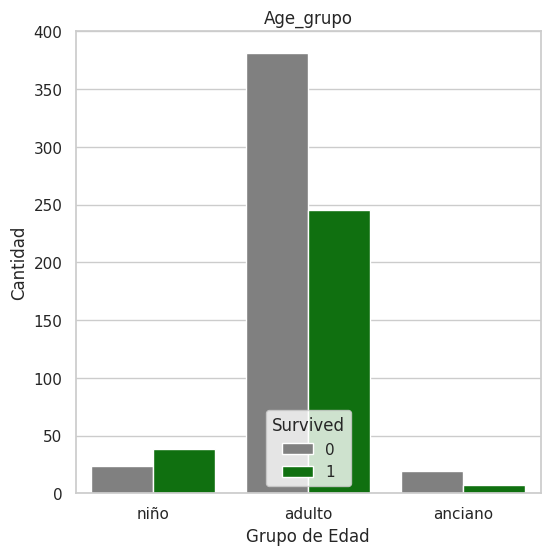

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
sns.countplot(x='Age_grupo', data=df, hue='Survived', palette=["gray", "green"])

plt.title("Age_grupo")
plt.xlabel("Grupo de Edad")
plt.ylabel("Cantidad")
plt.legend(title='Survived', loc='lower center')

plt.show()

Se nos muestra la edad de los pasajeros y su relación con la supervivencia. Se nos muestra que la media de los supervivientes y los no supervivientes es similar, tienen la misma mediana y que los rangos de edad son similares. Encontramos ligeras diferencias en los menores a 10 años, los cuales sobrevivieron más de los que fallecieron, cosa que no pasa en las demás edades.

#Costo del boleto

In [ ]:
dfFares = df.groupby('Survived')['Fare'].agg(['mean', 'median', 'min', 'max']).reset_index()
dfFares.columns = ['Survived', 'Media', 'Mediana', 'Mínimo', 'Máximo']
dfFares

,Survived,Media,Mediana,Mínimo,Máximo
0,0,22.117887,10.5,0.0,263.0000
1,1,48.395408,26.0,0.0,512.3292


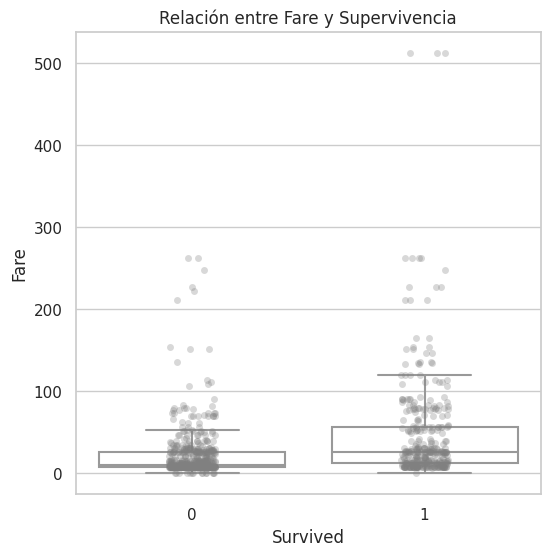

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x="Survived", y="Fare", color="white", showfliers=False)
sns.stripplot(data=df, x="Survived", y="Fare", jitter=True, alpha=0.3, color="gray")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.title("Relación entre Fare y Supervivencia")
plt.show()

 Existe una ligera relación entre el costo del boleto y la probabilidad de sobrevivir, aquellos que tenían boletos más costosos tenian una probabilidad mayor de sobrevivir.

#Relaciones entre clase y supervivencia

In [ ]:
dfPaS = pd.crosstab(df['Pclass'], df['Survived'], margins=True)
prp = dfPaS.div(dfPaS['All'], axis=0).round(2)

prp = prp.drop('All', axis=1).drop('All', axis=0)
prp

Survived,0,1
Pclass,,
1,0.37,0.63
2,0.53,0.47
3,0.76,0.24


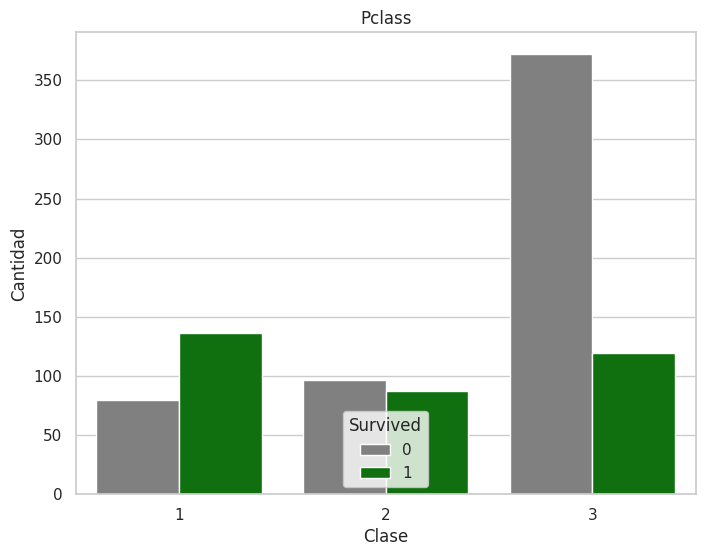

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=df, hue='Survived', palette=["gray", "green"])

plt.title("Pclass")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.legend(title='Survived', loc='lower center')

plt.show()

Se observa que existe una clara relación entre la gente de primera clase y el radio de supervivencia, debido a que son el único grupo que sobrevivió más que falleció. La segunda clase está más ecualizada, con ligeramente más fallecidos que sobrevivientes y la tercera clase con una distribución más centrada en los fallecidos que en los sobrevivientes.

#Género/Sexo

In [ ]:
dfSexo = pd.crosstab(df['Sex'], df['Survived'], margins=True)
prpS = dfSexo.div(dfSexo['All'], axis=0).round(2)

prpS = prpS.drop('All', axis=1).drop('All', axis=0)
prpS

Survived,0,1
Sex,,
female,0.26,0.74
male,0.81,0.19


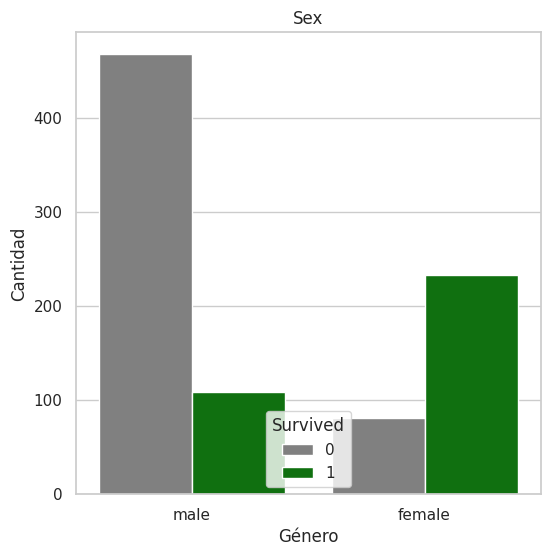

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
sns.countplot(x='Sex', data=df, hue='Survived', palette=["gray", "green"])

plt.title("Sex")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.legend(title='Survived', loc='lower center')

plt.show()

Existe una correlación alta entre el género y la supervivencia: las pasajeras femeninas sobrevivieron mucho más que los pasajeros masculinos.